In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=10,8
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv(r"C:/Users/hp/Downloads/train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset=dataset.drop(['PassengerId','Name','Fare','Ticket','Cabin'],axis=1)
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [6]:
def getNumber(str) :
    if str=="male":
        return 1
    else:
        return 2
    
dataset['gender']= dataset['Sex'].apply(getNumber)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,gender
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,2
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,1


In [7]:
del dataset['Sex']
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,gender
0,0,3,22.0,1,0,S,1
1,1,1,38.0,1,0,C,2
2,1,3,26.0,0,0,S,2
3,1,1,35.0,1,0,S,2
4,0,3,35.0,0,0,S,1


In [8]:
dataset=dataset.rename({'Age':'age'},axis=1)

In [9]:
dataset.isnull().sum()

Survived      0
Pclass        0
age         177
SibSp         0
Parch         0
Embarked      2
gender        0
dtype: int64

In [10]:
meanf=dataset[dataset.Survived==1].age.mean()
meanf

28.343689655172415

In [11]:
dataset['age']=np.where(pd.isnull(dataset.age)&dataset['Survived']==1,meanf,dataset['age'])
dataset.isnull().sum()

Survived      0
Pclass        0
age         125
SibSp         0
Parch         0
Embarked      2
gender        0
dtype: int64

In [12]:
meansf=dataset[dataset.Survived==0].age.mean()
meansf
dataset.age.fillna(meansf,inplace=True)

In [13]:
dataset.isnull().sum()

Survived    0
Pclass      0
age         0
SibSp       0
Parch       0
Embarked    2
gender      0
dtype: int64

In [14]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
dataset['Embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)
dataset['Embarked']=dataset.Embarked.fillna(dataset.Embarked.median())
dataset.isnull().sum()

Survived    0
Pclass      0
age         0
SibSp       0
Parch       0
Embarked    0
gender      0
dtype: int64

          Survived    Pclass       age     SibSp     Parch  Embarked    gender
Survived  1.000000 -0.338481 -0.085364 -0.035322  0.081629  0.106811  0.543351
Pclass   -0.338481  1.000000 -0.327130  0.083081  0.018443  0.045702 -0.131900
age      -0.085364 -0.327130  1.000000 -0.230465 -0.179217  0.004371 -0.092957
SibSp    -0.035322  0.083081 -0.230465  1.000000  0.414838 -0.059961  0.114631
Parch     0.081629  0.018443 -0.179217  0.414838  1.000000 -0.078665  0.245489
Embarked  0.106811  0.045702  0.004371 -0.059961 -0.078665  1.000000  0.116569
gender    0.543351 -0.131900 -0.092957  0.114631  0.245489  0.116569  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


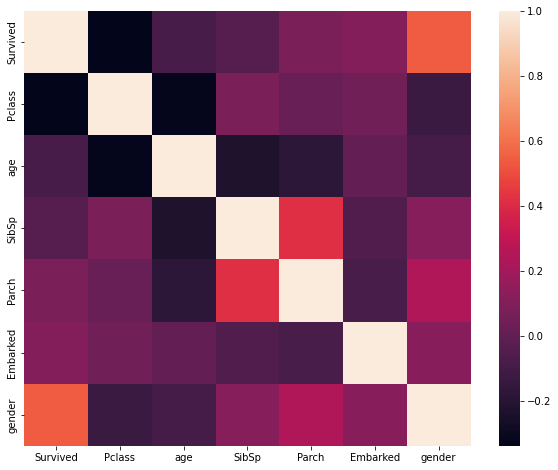

In [16]:
#trying to know the corelation
ax = sns.heatmap(dataset.corr())
print(dataset.corr())
print(ax)

In [17]:
#let's normalise the dataframe
#from sklearn.preprocessing import Normalizer
#normdataset=Normalizer()
#dataset=normdataset.fit_transform(dataset)
dataset

,Survived,Pclass,age,SibSp,Parch,Embarked,gender
0,0,3,22.000000,1,0,1.0,1
1,1,1,38.000000,1,0,2.0,2
2,1,3,26.000000,0,0,1.0,2
3,1,1,35.000000,1,0,1.0,2
4,0,3,35.000000,0,0,1.0,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,1.0,1
887,1,1,19.000000,0,0,1.0,2
888,0,3,30.626179,1,2,1.0,2
889,1,1,26.000000,0,0,2.0,1


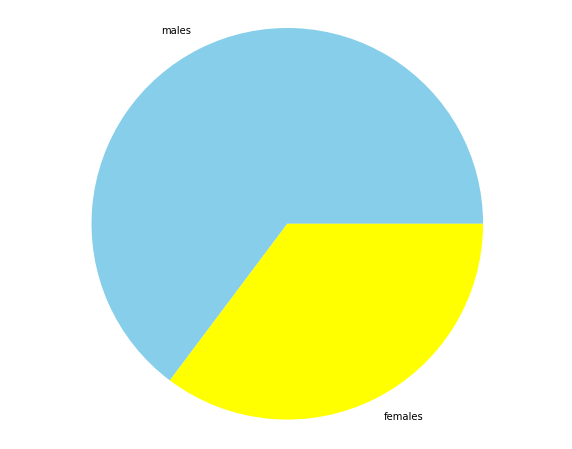

In [18]:
males=(dataset.gender==1).sum()
females=(dataset['gender']==2).sum()
p=[males,females]
plt.pie(p,labels=['males','females'],colors=['skyblue','yellow'])
plt.axis("equal")
plt.show()


In [19]:
malesS=dataset[(dataset.gender==1)&(dataset.Survived==1)].shape[0]
malesN=dataset[dataset.gender==1][dataset.Survived==0].shape[0]
femalesS=dataset[(dataset.gender==2)&(dataset.Survived==1)].shape[0]
femalesN=dataset[dataset.gender==2][dataset.Survived==0].shape[0]

print(malesS,malesN,femalesS,femalesN)

109 468 233 81


<function matplotlib.pyplot.show(close=None, block=None)>

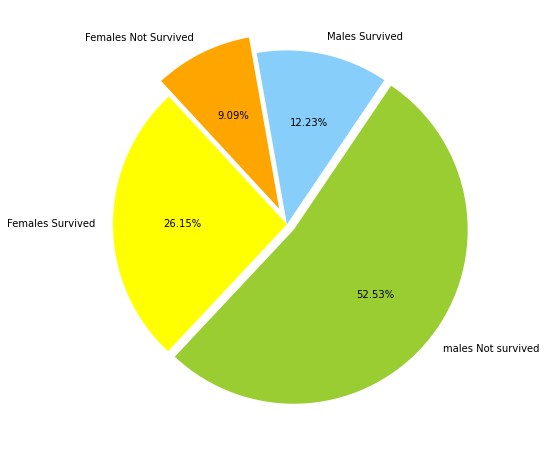

In [20]:
p2=[malesS,malesN,femalesS,femalesN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=['Males Survived','males Not survived','Females Survived','Females Not Survived']
explode=[0,0.05,0,0.1]
plt.pie(p2,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.show